# INTRODUCTION

This project will be examining data collected in 2014 from exit surveys of past employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education Institute (TAFE) in Queensland, Australia. These datasets are available [here for DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [here for TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). However, for this project that there were some modifications to make it easier to work with as compared to the original. Ultimately, we will be playing the role of data analyst in order to answer the following questions:

1) **Are employees who only worked for the institutes for a SHORT PERIOD OF TIME resigning due to some kind of dissatisfaction? What about employees who have been there LONGER?**

2) **Are YOUNGER employees resigning due to some kind of dissatisfaction? What about OLDER employees?**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv") 

In [3]:
# Info about DETE Survey
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.describe(include = 'all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,...,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,...,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,...,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,...,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [6]:
dete_survey['DETE Start Date'].value_counts(dropna = False).sort_index(ascending = False).head(10)

Not Stated    73
2013          21
2012          27
2011          40
2010          27
2009          24
2008          31
2007          34
2006          23
2005          20
Name: DETE Start Date, dtype: int64

In [7]:
dete_survey['Cease Date'].value_counts(dropna = False).sort_index(ascending = False).head(10)

Not Stated     34
2014            1
2013          200
2012          344
2010            1
12/2013        40
11/2013        16
11/2012         1
10/2013        20
09/2014         1
Name: Cease Date, dtype: int64

In [8]:
dete_survey['SeparationType'].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

Examining the DETE Survey data collected in **2014** of **822** former employees. This dataset consisted of several demographic variables (i.e Gender, Age) as well as other relevant background info as it pertains to their position at DETE (such as Employment Status). Additionally, there was also data pertaining to the decision to leave DETE that range across various subforms of grievances which appears to make up a large proportion of the number of variables. As it pertains to our original question, these variable may not be necessary in our analysis and will **likely need to be removed in the cleaning process**. 

Looking further into this dataset, we see that while some of the entries for certain columns have "not stated" replies, these values were not entered as "non-null values (i.e. *NaN*) as in the case for Dete Start Date, Cease Date, etc. Thus, these will need to be corrected for. 

In [9]:
# Info about TAFE Survey
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [10]:
tafe_survey.describe(include = 'all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
count,7.020000e+02,702,702,695.000000,701,437,437,437,437,437,...,594,587,586,581,596,596,596,596,596,596
unique,NaN,12,2,NaN,6,2,2,2,2,2,...,2,2,2,2,2,9,5,9,7,7
top,NaN,Brisbane North Institute of TAFE,Non-Delivery (corporate),NaN,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,56 or older,Permanent Full-time,Administration (AO),Less than 1 year,Less than 1 year
freq,NaN,161,432,NaN,340,375,336,420,403,411,...,536,512,488,416,389,162,237,293,147,177
mean,6.346026e+17,NaN,NaN,2011.423022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.515071e+14,NaN,NaN,0.905977,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.341330e+17,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.343954e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.345835e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.348005e+17,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [12]:
tafe_survey['CESSATION YEAR'].value_counts()

2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: CESSATION YEAR, dtype: int64

In [13]:
tafe_survey['Reason for ceasing employment'].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

In the case for the dataset containing the results of the TAFE survey, there were **701 entries** that appears to have been collected in **2014~ish**. As with the previous dataset, a large proportion of the data consisted of subcategories of the reasoning behind leaving the TAFE Institute as well as other demographic characteristics. However, unlike the previous dataset, there doesn't appear to be the same issue of not stating non-entries as "not stated". Lastly, this dataset appears to have a number of similar categories as the DETE survey dataset, albeit with a different namesake. We will need to somehow correct for this in our clean up process. 

# STEP 2: IDENTIFYING MISSING VALUES AND DROPPING UNNECESSARY COLUMNS

In [14]:
# Need to re-read the CSV file again for DETE Survey data 

dete_survey = pd.read_csv("dete_survey.csv", na_values = 'Not Stated')

In [15]:
dete_survey.describe(include = 'all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,788,749.000000,724.000000,817,455,717,126,817,...,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,24,NaN,NaN,15,8,8,14,5,...,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,NaN,NaN,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,...,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,NaN,NaN,324,161,135,54,434,...,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,1994.182911,1998.955801,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,13.880503,67.792281,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1963.000000,200.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,1982.000000,1995.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,1996.000000,2005.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,2007.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Need to drop unnecessary columns from dataframe for analysis

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [17]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [18]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

From the above processes, there was a trimming of the original datasets to remove any unnecessary info for our analysis which happened to be a combination of non-greviance or personal reasoning as well as duplicate responses. Futhermore, there was also a correction to the aforementioned responses of "Not Stated" to *NaN*. 

# STEP 3: CLEAN COLUMN NAMES

In [19]:
# Modifying the DETE Survey Column Names
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [20]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

In [21]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [22]:
mapping = {"Record ID":"id",
           "CESSATION YEAR":"cease_date",
           "Reason for ceasing employment":"separationtype",
           "Gender. What is your Gender?":"gender",
           "CurrentAge. Current Age":"age",
           "Employment Type. Employment Type":"employment_status",
           "Classification. Classification":"position",
           "LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service",
           "LengthofServiceCurrent. Length of Service at current workplace (in years)":"role_service"}

tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

In [23]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In this process, we've prepped the columns of each dataset between the two datasets to have comparable names for concatation. 

# STEP 4: FILTER THE DATA

In [24]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [25]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [26]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split("-").str.get(0)
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [27]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"].copy()

In [28]:
print(dete_resignations['separationtype'].value_counts())
print(tafe_resignations['separationtype'].value_counts())

Resignation    311
Name: separationtype, dtype: int64
Resignation    340
Name: separationtype, dtype: int64


From this filtering of only former employees who had actually put in a resignation (in other words, excluding those that retired or had left due to contractual or health-related issues), we've created a separate subset of the dataframe to work with to answer our initial question of whether **RESIGNATIONS** are related to age and/or duration of employment. 

# STEP 5: VERIFYING THE DATA

In this step, we are looking to verify if the years within the "cease_date" as well as "dete_start_date" columns make sense. Considering that (a) the collection date for this data was in 2014, (b) most folks that started work were in their 20s and would have retired before reaching age 70, a start date before 1940 as being really unrealistic; we need to assess the make up of this dataset to avoid any inherent issues with its makeup. 

In [29]:
# Checking DETE Start Dates
dete_resignations['dete_start_date'].describe()

count     283.000000
mean     2002.067138
std         9.914479
min      1963.000000
25%      1997.000000
50%      2005.000000
75%      2010.000000
max      2013.000000
Name: dete_start_date, dtype: float64

In [30]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



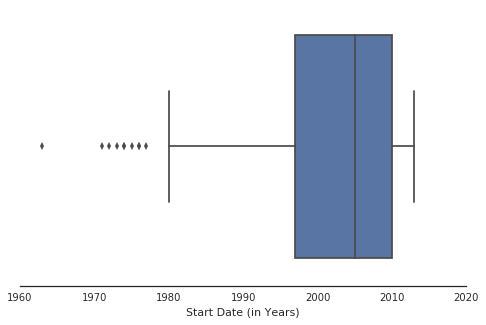

In [31]:
ax = plt.figure(figsize = (8, 5))
sns.set_style('white')
ax2 = sns.boxplot(dete_resignations['dete_start_date'])
ax2.set_xlabel("Start Date (in Years)")
sns.despine(left = True)

In [32]:
# Checking DETE Cease Dates
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [33]:
# Checking DETE cease date
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split("/").str.get(-1)
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [34]:
 dete_resignations['cease_date']= dete_resignations['cease_date'].astype(float)

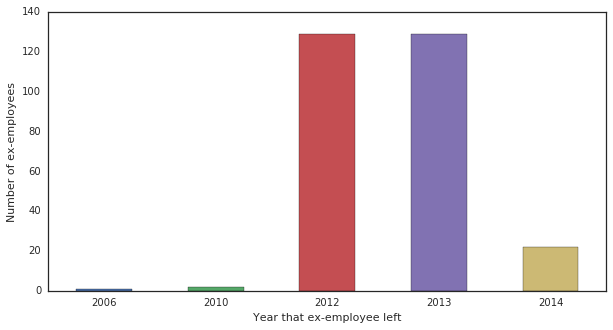

In [35]:
dete_cease_dates = pd.DataFrame({"Years":['2006','2010','2012','2013','2014'] , "Nums":[1,2,129,129,22]})
ax3 = dete_cease_dates.plot.bar(x = "Years", y = "Nums", rot = 360, legend = False, figsize = (10,5))
ax3.set_xlabel("Year that ex-employee left")
ax3.set_ylabel("Number of ex-employees")

In [36]:
# Checking TAFE Cease Dates
tafe_resignations['cease_date'].value_counts(dropna = False)

 2011.0    116
 2012.0     94
 2010.0     68
 2013.0     55
NaN          5
 2009.0      2
Name: cease_date, dtype: int64

In [37]:
tafe_resignations['cease_date'].describe()

count     335.000000
mean     2011.394030
std         1.005952
min      2009.000000
25%      2011.000000
50%      2011.000000
75%      2012.000000
max      2013.000000
Name: cease_date, dtype: float64

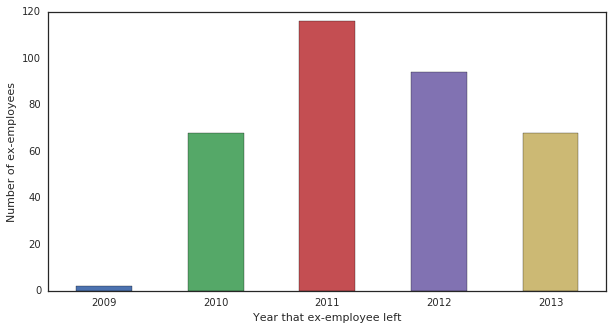

In [38]:
tafe_cease_dates = pd.DataFrame({"Years":['2009','2010','2011','2012','2013'] , "Nums":[2, 68, 116, 94, 68]})
ax4 = tafe_cease_dates.plot.bar(x = "Years", y = "Nums", rot = 360, legend = False, figsize = (10,5))
ax4.set_xlabel("Year that ex-employee left")
ax4.set_ylabel("Number of ex-employees")

Examining the start date for DETE ex-employees, the start date ranged from 1963 to 2013 with the majority of the start date being 2010 & 2011. As for the cease date, the range is from 2006-2013 with the majority in 2012 & 2013. 

Examining the cease date for the TAFE ex-employees, the majority occured in 2011, but the range from 2009-2013. 

Although the range of the years don't quite line up, it doesn't seem to be any sort of cause for concern in regards to our data for our analysis. 

# STEP 6: CREATE A NEW COLUMN

In [39]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [40]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [41]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

In [42]:
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

In the TAFE dataset, the "institute service" column contains information pertaining to the length of employment which was gleamed from the cease date subtracted by start date (not available). While this variable was not made in the DETE survey dataset, we went ahead and processed this as it was necessary to delineate b/t short- and long-term ex-employees. 

# STEP 7: IDENTIFYING DISSATISFIED EMPLOYEES

In [43]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [44]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Observing both cases, it appears that "-" is used to define "False". We need to modify the outcomes so that the values returned are "True", "False" or *NaN*. 

In [45]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == "-":
        return False
    else:
        return True 

In [46]:
factors = ["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]
tafe_resignations['dissatisfied'] = tafe_resignations[factors].applymap(update_vals).any(axis = 1, skipna = False)

In [47]:
tafe_resignations['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [48]:
factorss = ["job_dissatisfaction", 
            "dissatisfaction_with_the_department",
            "physical_work_environment",
            "lack_of_recognition",
            "lack_of_job_security",
            "work_location",
            "employment_conditions",
            "work_life_balance", 
            "workload"]

In [49]:
dete_resignations['dissatisfied'] = dete_resignations[factorss].any(axis = 1, skipna = False)

In [50]:
dete_resignations['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [51]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In the original TAFE and DETE dataset, there were various columns used to identify dissatisfaction. However, as we are only concern with dissatisfaction in general, there is a need to summarize it as a whole. Furthermore, in the case of TAFE, there isn't a uniform response to dissatisfaction as it was column specific. Therefore, we've created a new column that is attached to the dataframe that provides the following responses: True, False or *Nan*. 

# STEP 8: COMBINE THE DATA

In [52]:
dete_resignations_up['institute'] = "DETE"

In [53]:
tafe_resignations_up['institute'] = "TAFE"

In [54]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis = 0, ignore_index = True)

In [55]:
combined.isnull().sum()

Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. Career Move - Self-employment    319
Contributing Factors. Dissatisfaction                  319
Contributing Factors. Ill Health                       319
Contributing Factors. Interpersonal Conflict           319
Contributing Factors. Job Dissatisfaction              319
Contributing Factors. Maternity/Family                 319
Contributing Factors. NONE                             319
Contributing Factors. Other                            319
Contributing Factors. Study                            319
Contributing Factors. Travel                           319
Institute                                              311
WorkArea                                               311
aboriginal                                             644
age                                                     55
business_unit                                          6

In [56]:
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

In [57]:
combined_updated.isnull().sum()

age                  55
cease_date           16
dissatisfied          8
employment_status    54
gender               59
id                    0
institute             0
institute_service    88
position             53
separationtype        0
dtype: int64

In [58]:
combined_updated.describe(include = 'all')

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
count,596,635.000000,643,597,592,6.510000e+02,651,563,598,651
unique,17,NaN,2,6,2,NaN,2,49,21,1
top,51-55,NaN,False,Permanent Full-time,Female,NaN,TAFE,Less than 1 year,Administration (AO),Resignation
freq,71,NaN,403,256,424,NaN,340,73,148,651
mean,NaN,2011.963780,NaN,NaN,NaN,3.314265e+17,NaN,NaN,NaN,NaN
std,NaN,1.079028,NaN,NaN,NaN,3.172210e+17,NaN,NaN,NaN,NaN
min,NaN,2006.000000,NaN,NaN,NaN,4.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,NaN,NaN,NaN,4.525000e+02,NaN,NaN,NaN,NaN
50%,NaN,2012.000000,NaN,NaN,NaN,6.341820e+17,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,NaN,NaN,NaN,6.345770e+17,NaN,NaN,NaN,NaN


In this process, we've gone ahead and concatenate the two datasets into one through the "institute" column that delineates DETE and TAFE. Furthermore, while we still had some columns within both dataset that are not necessary for the analysis, we dropped them in cleaning the dataframe. Specifically we've dropped **columns** with less than 500 non-null values. 

# STEP 9: CLEAN THE SERVICE COLUMN

In [59]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
17.0                   6
22.0                   6
12.0                   6
14.0                   6
10.0                   6
16.0                   5
18.0                   5
23.0                   4
11.0                   4
24.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [60]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

In [61]:
pattern = r"([0-9]+)"
combined_updated["institute_service"] = combined_updated["institute_service"].str.extract(pattern, expand = True).astype(float)

In [62]:
combined_updated["institute_service"].value_counts(dropna= False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [63]:
def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "New"
    elif val <= 6:
        return "Experienced"
    elif val <= 10:
        return "Established"
    else:
        return "Veteran"

In [64]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stage)

In [65]:
combined_updated['service_cat'].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In this section, we've went ahead to clean up the "institute_service" column which denotes the duration of employment. However, as there were vaious degrees of entry that differed b/t the DETE and TAFE data set, we needed to be able to create a unifying model of selection which happened to be the following:

New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company

To do so, we needed to first extract the entries that contain duration length adn fit it within this model and create a new column called "service_cat". 

# STEP 10: INITIAL ANALYSIS

In [66]:
combined_updated['service_cat'].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [67]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [68]:
# Fill in values with False

combined_updated['dissatisfied']= combined_updated['dissatisfied'].fillna(False)

In [69]:
combined_updated['dissatisfied'].value_counts(dropna= False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [70]:
pv_dissatisfiedxservice_cat = combined_updated.pivot_table(values = "dissatisfied", index = "service_cat")

In [71]:
pv_dissatisfiedxservice_cat

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


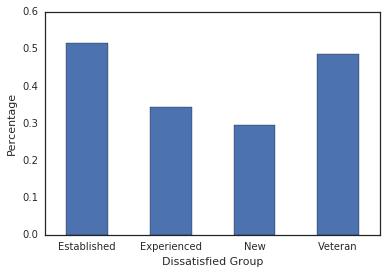

In [72]:
ax5 = pv_dissatisfiedxservice_cat.plot(kind = 'bar', legend = False, rot = 360)
ax5.set_xlabel("Dissatisfied Group")
ax5.set_ylabel("Percentage")

Examining the data set, it was found that those that had formerly worked at either TAFE or DETE for a long period were generally found to have been dissatisfied as compared to more newer ex-employees. 

# EXTRA: Looking at Age

In [73]:
combined_updated['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Based on these findings, we see that **55** ex-employees failed to include age into analysis whilst the rest are entries that are written in ranges of 5 yr intervals. 

As it is the goal to establish age groups, the best approach would be join the groups within the similar categories:

    "20 or younger" as **"< 20"**
    "21-25" OR "21  25" as **"21-25"**
    "26-30" OR "26  30" as **"26-30"**
    "31-35" OR "31  35" as **"31-35"**
    "36-40" OR "36  40" as **"36-40"**
    "41-45" OR "41  45" as **"41-45" **
    "46-50" OR "46  50" as **"46-50"**
    "51-55" as **"51-55"**
    "56-60" OR "56 or older" OR "61 or older" as **"> 56"**

In [74]:
combined_updated['age'].astype(str)

pattern = r"([0-9]+)"

combined_updated['age_correct'] = combined_updated['age'].str.extract(pattern, expand = True).astype(float)

combined_updated['age_correct'].value_counts(dropna = False)

 41.0    93
 46.0    81
 36.0    73
 51.0    71
 26.0    67
 21.0    62
 31.0    61
NaN      55
 56.0    55
 61.0    23
 20.0    10
Name: age_correct, dtype: int64

In [75]:
mean_age = combined_updated['age_correct'].mean()
print(round(mean_age, 2))

39.27


In [76]:
median_age = combined_updated['age_correct'].median()
print(round(median_age,2))

41.0


In [77]:
mode_age = combined_updated['age_correct'].median()
print(round(mode_age,2))

41.0


Based on these central limit findings, it appears that there is about a gaussian distribution where the average age is about 40 years old. As such, we will plan to fill out the missing value as 39.27.

In [78]:
def age_groups(val):
    if pd.isnull(val):
        return np.nan
    elif val == 20:
        return "less than 20s"
    elif (val == 21) or (val == 26):
        return "20s"
    elif (val == 31) or (val == 36):
        return '30s'
    elif (val == 41) or (val == 46):
        return '40s'
    elif (val == 51) or (val == 56):
        return '50s'
    elif val == 61:
        return '60s or greater'

In [79]:
combined_updated['age_cat'] = combined_updated['age_correct'].apply(age_groups)

In [80]:
combined_updated['age_cat'].value_counts(dropna = False)

40s               174
30s               134
20s               129
50s               126
NaN                55
60s or greater     23
less than 20s      10
Name: age_cat, dtype: int64

In [81]:
combined_updated['age_cat'] = combined_updated['age_cat'].fillna("40s")

In [82]:
pv_dissatisfied_age = combined_updated.pivot_table(values = "dissatisfied", index = "age_cat")
pv_dissatisfied_age

,dissatisfied
age_cat,
20s,0.364341
30s,0.358209
40s,0.349345
50s,0.404762
60s or greater,0.521739
less than 20s,0.200000


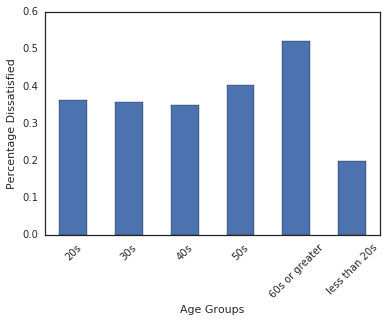

In [83]:
ax6 = pv_dissatisfied_age.plot(kind = 'bar', legend = False, rot = 45)
ax6.set_xlabel("Age Groups")
ax6.set_ylabel("Percentage Dissatisfied")

Upon examining the age groups of ex-employees from both DETE and TAFE, it was observed that there was no significant difference observed amongst "younger" ex-employees (i.e. 20s-30s) as it pertains to dissatisfaction. However this measure of dissatisfaction was noticeably increased amongst those in their 50s and 60s+. 

# EXTRA: Looking at each individual Service Cat

In [84]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 13 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         651 non-null bool
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null float64
position             598 non-null object
separationtype       651 non-null object
service_cat          563 non-null object
age_correct          596 non-null float64
age_cat              651 non-null object
dtypes: bool(1), float64(4), object(8)
memory usage: 61.7+ KB


In [85]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [86]:
# Create Bools 

New_only = combined_updated['service_cat'] == "New"
Experienced_only = combined_updated['service_cat'] == "Experienced"
Established_only = combined_updated['service_cat'] == 'Established'
Veteran_only = combined_updated['service_cat'] == 'Veteran'
Null_only = combined_updated['service_cat'].isnull()

In [87]:
Combined_Only = New_only | Experienced_only | Veteran_only |  Established_only

In [88]:
Known_Service = combined_updated[Combined_Only]
Unknown_Service = combined_updated[Null_only]
Experienced = combined_updated[Experienced_only]
Established = combined_updated[Established_only]
Veteran = combined_updated[Veteran_only]
New = combined_updated[New_only]

In [89]:
Known_Service['dissatisfied'].value_counts(dropna = False)

False    349
True     214
Name: dissatisfied, dtype: int64

In [90]:
New['dissatisfied'].value_counts(dropna = False)

False    136
True      57
Name: dissatisfied, dtype: int64

In [91]:
Experienced['dissatisfied'].value_counts(dropna = False)

False    113
True      59
Name: dissatisfied, dtype: int64

In [92]:
Established['dissatisfied'].value_counts(dropna = False)

True     32
False    30
Name: dissatisfied, dtype: int64

In [93]:
Veteran['dissatisfied'].value_counts(dropna = False)

False    70
True     66
Name: dissatisfied, dtype: int64

In [94]:
Unknown_Service['dissatisfied'].value_counts(dropna = False)

False    62
True     26
Name: dissatisfied, dtype: int64

When examining each service category group, our findings matched our earlier analysis whereby those that had a longer tenure were related were more likely to have reported dissatisfaction as compared to ex-employees with a shorter tenure. 

# EXTRA: TAFE vs DETE

In [95]:
combined_updated['institute'].value_counts(dropna = False)

TAFE    340
DETE    311
Name: institute, dtype: int64

In [96]:
TAFE_Only = combined_updated[combined_updated['institute'] == "TAFE"]
DETE_Only = combined_updated[combined_updated['institute'] == "DETE"]

In [97]:
TAFE_Only['dissatisfied'].value_counts(dropna = False)

False    249
True      91
Name: dissatisfied, dtype: int64

In [98]:
DETE_Only['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [99]:
pv_institutexdissatisfied = combined_updated.pivot_table(values = 'dissatisfied', index = 'institute')
pv_institutexdissatisfied

,dissatisfied
institute,
DETE,0.479100
TAFE,0.267647


(0, 1)

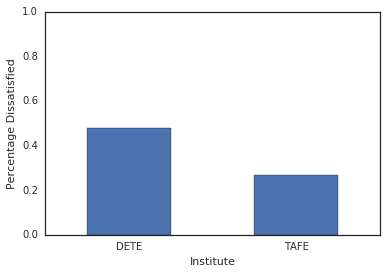

In [100]:
ax7 = pv_institutexdissatisfied.plot(kind = 'bar', rot = 360, legend = False)
ax7.set_xlabel("Institute")
ax7.set_ylabel("Percentage Dissatisfied")
ax7.set_ylim(0, 1)

Between institutes, it looks as if folks from the DETE who had left were more likely to have reported dissatisfaction as a contributing factor to leaving as compared to those that had worked at TAFE. 

In [101]:
TAFE_agexdissatisfied = TAFE_Only.pivot_table(values = "dissatisfied", index = 'age_cat')
TAFE_agexdissatisfied 

,dissatisfied
age_cat,
20s,0.276923
30s,0.250000
40s,0.283582
50s,0.250000
less than 20s,0.222222


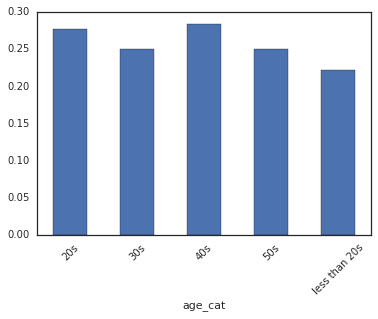

In [102]:
TAFE_agexdissatisfied.plot(kind = 'bar', rot = 45, legend = False) 

In [103]:
TAFE_servicexdissatisfied = TAFE_Only.pivot_table(values = "dissatisfied", index = 'service_cat')
TAFE_servicexdissatisfied 

,dissatisfied
service_cat,
Established,0.333333
Experienced,0.250000
New,0.262774
Veteran,0.277778


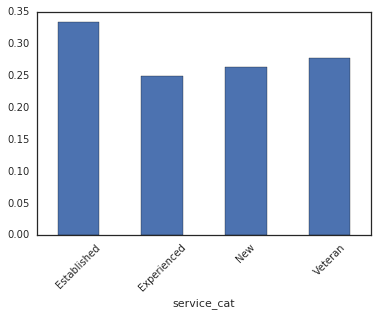

In [104]:
TAFE_servicexdissatisfied.plot(kind = 'bar', rot = 45, legend = False)

In examining TAFE data, we see that there was no difference as it pertains to age of ex-employees in terms of dissatisfication. However, amongst established ex-employees, they were more likely to have reported dissatisfaction. 

In [105]:
DETE_agexdissatisfied = DETE_Only.pivot_table(values = "dissatisfied", index = 'age_cat')
DETE_agexdissatisfied 

,dissatisfied
age_cat,
20s,0.453125
30s,0.457143
40s,0.442105
50s,0.586207
60s or greater,0.521739
less than 20s,0.000000


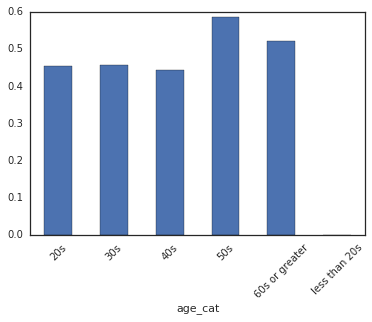

In [106]:
DETE_agexdissatisfied.plot(kind = 'bar', rot = 45, legend = False)

In [107]:
DETE_servicexdissatisfied = DETE_Only.pivot_table(values = "dissatisfied", index = 'service_cat')
DETE_servicexdissatisfied 

,dissatisfied
service_cat,
Established,0.609756
Experienced,0.460526
New,0.375000
Veteran,0.560000


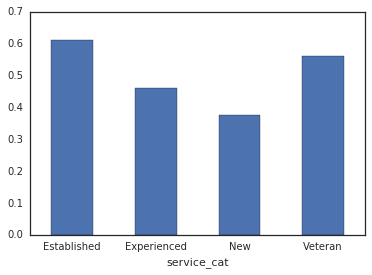

In [108]:
DETE_servicexdissatisfied.plot(kind = 'bar', rot = 360, legend = False) 

Unlike the TAFE ex-employees, the DETE ex-employees did resemble a trend in greater reporting of dissatisfaction amongst older ex-employees as compared to younger ex-employees. Furthermore, this trend is also noted amongst Established and Veteran ex-employees as compared to New and Experienced ex-employees. 